In [214]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,5
import pandas as pd
import matplotlib.pyplot as plt

**Взял данные по погоде из 'живого архива', т.к живу в Самаре решли рассматривать данные этого города.**

In [215]:
page_url = 'http://pogoda-service.ru/archive_gsod_res.php?country=RS&station=289000&datepicker_beg=01.01.2020&datepicker_end=31.12.2020&bsubmit=%D0%9F%D0%BE%D1%81%D0%BC%D0%BE%D1%82%D1%80%D0%B5%D1%82%D1%8C'
df = pd.read_html(page_url, attrs = {'class': 'table_res'}, encoding='utf-8')[0]
df[:10]

,Дата,Максимальная температура,Минимальная температура,Средняя температура,Атмосферное давление,Скорость ветра,Осадки,Эффективная температура
0,01.01.2020,-1.0,-3.0,-2.2,NaN,2,1.0,-5.3
1,02.01.2020,-1.8,-9.0,-6.3,NaN,4,1.0,-11.2
2,03.01.2020,-0.9,-8.0,-4.6,NaN,6,0.0,-10.6
3,04.01.2020,1.0,-3.8,-1.5,NaN,7,0.0,-7.8
4,05.01.2020,1.0,-3.0,0.0,NaN,4,NaN,-4.2
5,06.01.2020,0.9,-5.0,-2.5,NaN,1,2.0,-5.0
6,07.01.2020,-2.0,-7.0,-4.1,NaN,2,4.0,-7.4
7,08.01.2020,-3.6,-7.0,-6.0,NaN,1,0.0,-8.9
8,09.01.2020,-2.3,-5.8,-3.8,NaN,6,0.0,-9.7
9,10.01.2020,-3.7,-6.2,-4.4,NaN,4,1.0,-9.1


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Дата                      366 non-null    object 
 1   Максимальная температура  366 non-null    float64
 2   Минимальная температура   366 non-null    float64
 3   Средняя температура       366 non-null    float64
 4   Атмосферное давление      0 non-null      float64
 5   Скорость ветра            366 non-null    int64  
 6   Осадки                    321 non-null    float64
 7   Эффективная температура   366 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 23.0+ KB


In [217]:
df.to_csv('Samara_2020.csv', index=False)

In [218]:
Samara_2020 = df.copy()

In [219]:
Samara_2020.drop(['Атмосферное давление', 'Осадки'], axis='columns', inplace=True)
Samara_2020 = Samara_2020.dropna()
Samara_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Дата                      366 non-null    object 
 1   Максимальная температура  366 non-null    float64
 2   Минимальная температура   366 non-null    float64
 3   Средняя температура       366 non-null    float64
 4   Скорость ветра            366 non-null    int64  
 5   Эффективная температура   366 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 20.0+ KB


In [220]:
Samara_2020.head(5)

,Дата,Максимальная температура,Минимальная температура,Средняя температура,Скорость ветра,Эффективная температура
0,01.01.2020,-1.0,-3.0,-2.2,2,-5.3
1,02.01.2020,-1.8,-9.0,-6.3,4,-11.2
2,03.01.2020,-0.9,-8.0,-4.6,6,-10.6
3,04.01.2020,1.0,-3.8,-1.5,7,-7.8
4,05.01.2020,1.0,-3.0,0.0,4,-4.2


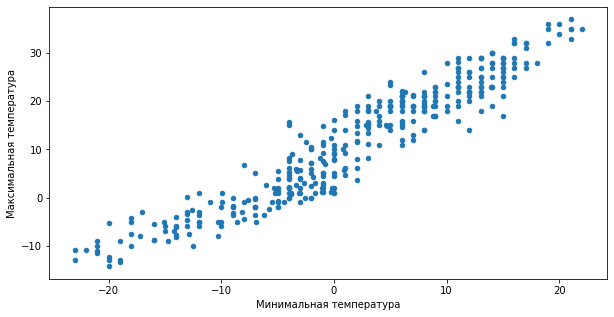

In [221]:
Samara_2020.plot.scatter(x='Минимальная температура' , y='Максимальная температура')

([], <a list of 0 Text major ticklabel objects>)

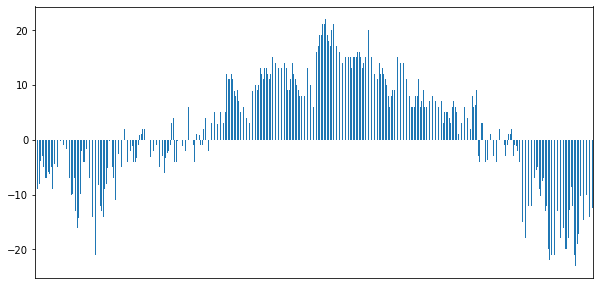

In [222]:
Samara_2020['Минимальная температура'].plot(kind='bar', rot=45)  #'Минимальная температура'
plt.xticks([])

([], <a list of 0 Text major ticklabel objects>)

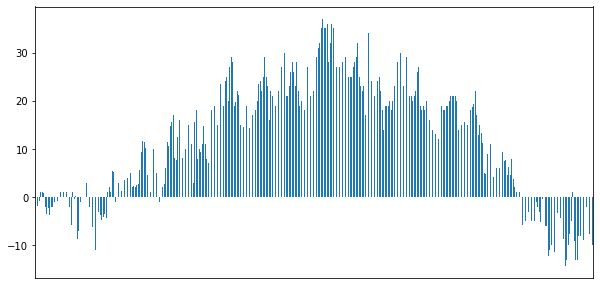

In [223]:
Samara_2020['Максимальная температура'].plot(kind='bar', rot=45)  #'Максимальная температура'
plt.xticks([])

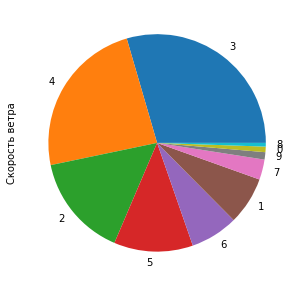

In [224]:
Wind_days = Samara_2020.sort_values('Скорость ветра')['Скорость ветра'].value_counts() #(by='Count', ascending=False)  #groupby(['Скорость ветра']) 
# name_dynamics
Wind_days.plot(kind='pie', y='Count')

**По диаграмме видно, что самые ветренные дни, когда ветер достигал от 2 до 4 м/с. Безветренной погоды и с порывами ветрами, это особые дни. Не так много.**

In [225]:
import seaborn as sns

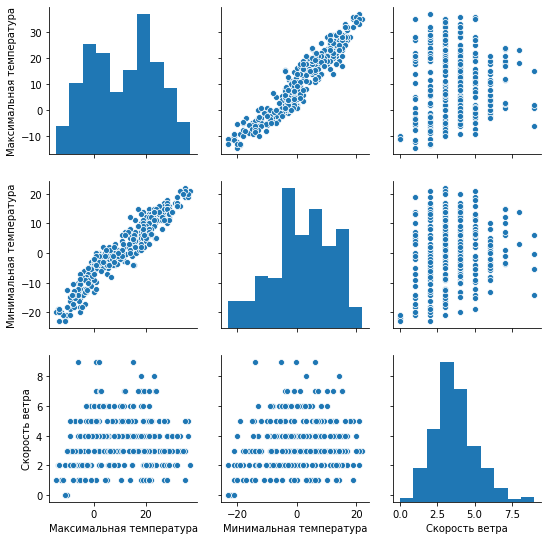

In [226]:
sns_plot = sns.pairplot(
    Samara_2020[['Максимальная температура', 'Минимальная температура', 'Скорость ветра']])
sns_plot

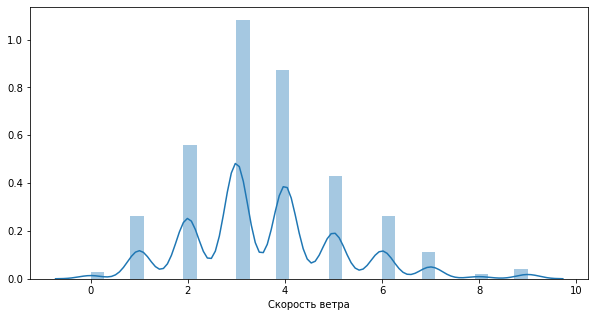

In [227]:
sns.distplot(Samara_2020['Скорость ветра'])

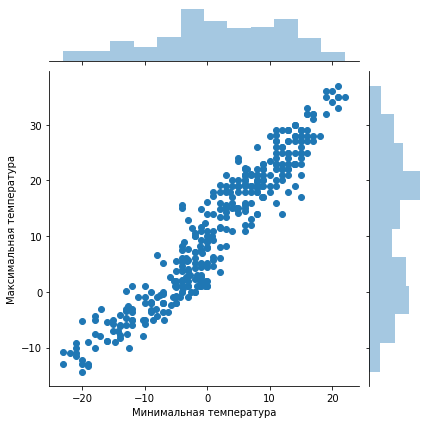

In [228]:
sns.jointplot(x='Минимальная температура', y='Максимальная температура', 
              data=Samara_2020, kind='scatter')

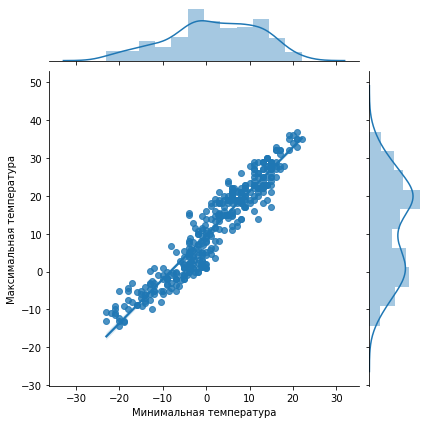

In [229]:
sns.jointplot(x='Минимальная температура', y='Максимальная температура', 
              data=Samara_2020, kind='reg')

**Рассмотрим данную модель, линия это некая усреднённая величина, которая показывает как вела температура в данный год в местности. Если взять разные такие линии за разные года, то можно сказать, какой год был жарче или холоднее. Или вовсе аномальный.**

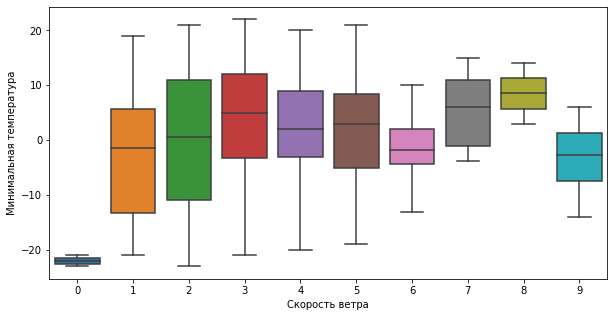

In [230]:
axmin = sns.boxplot(x='Скорость ветра', y='Минимальная температура', 
            data=Samara_2020)

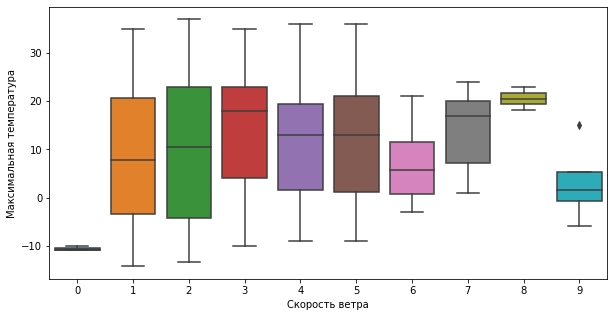

In [231]:
axmax = sns.boxplot(x='Скорость ветра', y='Максимальная температура', 
            data=Samara_2020)

**Если рассматривать медиану температур (максимальной и минимальной), то с ростом скорости ветра становится холодней. Можно заметить особенности при значениях ветра 3 м/с и 9 м/с При скорости 3 м/с есть особые дни, когда становится особо холодно. А в случае со скоростью 9 м/с дни, с особой жарой.**

**Также в этом году только с 03.12.20 по 05.12.20 была скорость ветра 0, это отчётливо видно на графике.**

**Нарисуем в Plotly осебые случаи, чтобы визуально осмотреть данные.**

In [232]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [233]:
data = []
data.append(
        go.Box(y=Samara_2020[Samara_2020['Скорость ветра']==3]['Максимальная температура'], 
               name='Максимальная температура при скорости ветра 3')
    )
data.append(
        go.Box(y=Samara_2020[Samara_2020['Скорость ветра']==9]['Максимальная температура'], 
               name='Максимальная температура при скорости ветра 9')
    )
iplot(data, show_link = False)

In [235]:
data = []
data.append(
        go.Box(y=Samara_2020[Samara_2020['Скорость ветра']==3]['Минимальная температура'], 
               name='Минимальная температура при скорости ветра 3')
    )
data.append(
        go.Box(y=Samara_2020[Samara_2020['Скорость ветра']==9]['Минимальная температура'], 
               name='Минимальная температура при скорости ветра 9')
    )
iplot(data, show_link = False)